In [1]:
dataset_url = "https://raw.githubusercontent.com/harika-bonthu/02-linear-regression-fish/master/datasets_229906_491820_Fish.csv"

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fish = pd.read_csv(dataset_url)
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [9]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [14]:
X = fish.iloc[:,1:]
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [19]:
y = fish['Species']
y.head()

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object

In [20]:
#Scaling the input features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [21]:
#Label Encoding the target variable using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [25]:
#Splitting into train and test datasets using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [27]:
#Model Building and training

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf

LogisticRegression()

In [28]:
clf.fit(X_train,y_train)

LogisticRegression()

In [30]:
#Predicting the output
y_pred = clf.predict(X_test)
y_pred

array([2, 5, 2, 2, 2, 0, 5, 2, 2, 3, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 5, 0,
       0, 0, 0, 2, 2, 2, 5, 5, 3, 2])

In [31]:
y_test

array([2, 5, 3, 6, 2, 0, 5, 4, 2, 3, 0, 6, 0, 1, 0, 0, 2, 2, 2, 0, 5, 0,
       0, 0, 0, 2, 2, 6, 5, 5, 3, 2])

In [34]:
#Computing the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

81.25

In [35]:
#Our model achieved 81.25% accuracy, which is pretty good.

In [36]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
cf

array([[10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  3,  0,  0,  0,  0]])

Text(0.5, 1.0, 'Confusion Matrix')

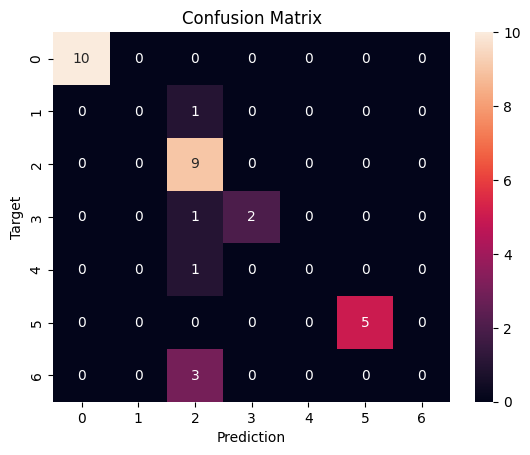

In [38]:
sns.heatmap(cf,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')